In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import scipy.optimize
from os import walk

In [47]:
filenames = next(walk('../data/3/Orientierungszeiten'))[2]
data = {}
for i, filename in enumerate(filenames):
    data[float(filename.replace(',', '.'))] = np.loadtxt('../data/3/Orientierungszeiten/' + filename)

(3.2731123698155313, 0.014020347980585032)
(2.9226356389098003, 0.009856409150939114)
(2.688667573850165, 0.013699223642976599)


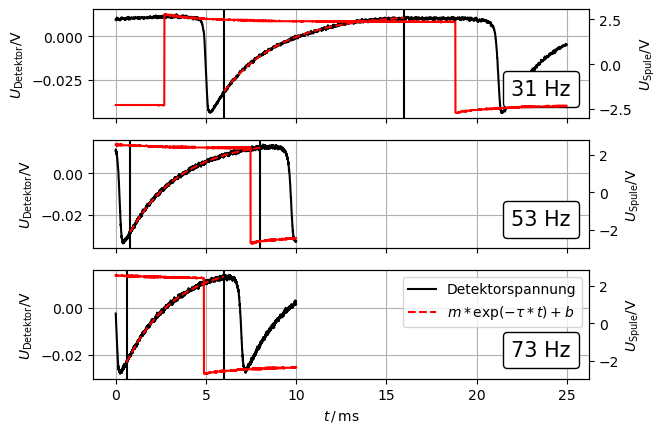

In [48]:
ranges = {31.0 : [600, 1600], 53.0 : [200, 2000], 73.0 : [150, 1500] }
fig, ax = plt.subplots(len(data), 1, sharex='all')
for i, f in enumerate(data):
    ax1 = ax[i]
    transmission = data[f][:, 2]
    time = data[f][:, 0] * 1e3
    magnetic_field = data[f][:, 1] / 10

    def monoExp(x, m, t, b):
       return m * np.exp(- x / t) + b

    p0 = (0.5, 3, 2.25) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(monoExp, time[ranges[f][0]:ranges[f][1]], transmission[ranges[f][0]:ranges[f][1]], p0)
    m, t, b = params

    ax1.plot(time, transmission, 'k', label='Detektorspannung')
    ax1.axvline(time[ranges[f][0]], c='k')
    ax1.axvline(time[ranges[f][1]], c='k')
    ax1.set(ylabel='$U_\mathrm{Detektor} / \mathrm{V}$')

    ax1.plot(time[ranges[f][0]:ranges[f][1]], monoExp(time[ranges[f][0]:ranges[f][1]], m, t, b), 'r--', label="$m * \mathrm{exp}(-\\tau*t) + b$")

    at = AnchoredText(
    f'{f:.0f} Hz', prop=dict(size=15), frameon=True, loc='lower right')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax1.add_artist(at)
    ax2 = ax1.twinx()
    ax2.set(ylabel='$U_\mathrm{Spule} / \mathrm{V}$')
    ax2.plot(time, magnetic_field, c='r', label='Spulenspannung')
    ax1.grid()
    print((t,(np.sqrt(np.diag(cv)), t)[0][1]))
ax[2].legend()
ax[2].set(xlabel='$t\,/\, \mathrm{ms}$')

fig.savefig('../output/orientierungszeit.svg')